<a href="https://colab.research.google.com/github/Rocha212/Senales/blob/main/Parcial_1/parcial1__tomas_Rocha_Casta%C3%B1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: Señales y Sistemas 2024-II

 ## Profesor: Andrés Marino Álvarez Meza, Ph.D.


## Departamento de Ingeniería Eléctrica, Electrónica, y Computación
## Universidad Nacional de Colombia - sede Manizales

Parcial realizado: Tomas Rocha Castaño

# Instrucciones

-- Para recibir el crédito total, sus respuestas deben estar justificadas de manera clara, detallada y concreta, mostrando los procedimientos y razonamientos paso a paso.

-- Está permitido el uso de herramientas de inteligencia artificial (IA). Si las utiliza, por favor declare explícitamente cómo fueron empleadas en la resolución de cada pregunta. Incluya los prompts (consultas) y las iteraciones realizadas con las IA durante el desarrollo del parcial.

-- La entrega del parcial debe realizarse antes de las 23:59 del 5 de diciembre de 2024 al correo electrónico amalvarezme@unal.edu.co mediante un enlace de GitHub.

-- Los códigos deben estar debidamente comentados en las celdas correspondientes y explicados en celdas de texto (markdown). Los códigos que no incluyan comentarios ni discusiones no serán considerados en la evaluación final.

# Pregunta 1 (valor 2.5 puntos)

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de $5kHz$,entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua $x(t) = 0.3 \cos(1000\pi t-\pi/4) +
0.6 \sin(2000\pi t) + 0.1 \cos(11000\pi t-\pi)$?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal $x(t)$.

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

# Rta//

$ x(t)= 0.3\cos(1000πt- π/4) + 0.6\sin(2000π)+ 0.1\cos(11000πt-π)$

$Fs = 5000 Hz$

$estados= 2^5= 32$

Primero se revisa si la frecuencia de muestro cumple con el teorema de nyquist, donde este establece que la frecuencia de muestro tiene que ser al menos el doble a la frecuencia lineal maxima de la señal continua, entonces:

\begin{equation}
ωmax= 11000π=2π*Fmax\\
Fmax= \frac{11000π}{2π}\\
Fmax= 5500 Hz
\end{equation}

Con este valor se puede reemplazar en el teorema de nyguist y denotar si la frecuencia de muestreo es suficiente para que no haya aliasing o distorsion a la hora de discretizar y cuantizar

\begin{equation}
Fs\geq2Fmax\\
5000Hz\geq2*5500Hz\\
5000Hz\geq11000Hz
\end{equation}

Como se puede apreciar no se cumple el teorema de nyquist, entonces con esta frecuencia de muestreo vamos a tener Aliasing o distorsión



In [ ]:
#Se importan las librerias numpy y sympy para simular la señales continuas y discretas
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.spatial.distance import cdist

ahora se grafica la señal original con la ayuda de sympy para graficar señales continuas

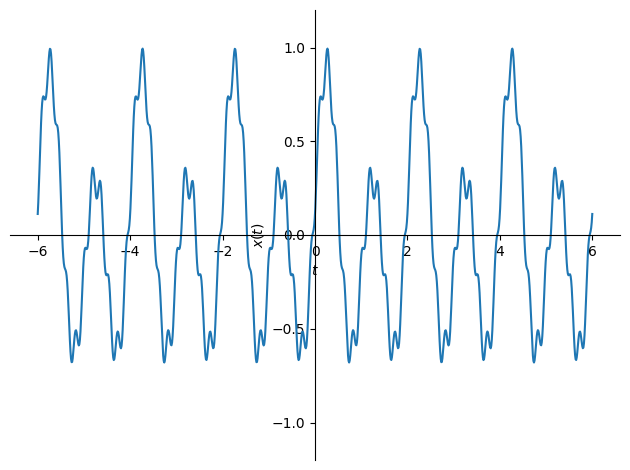

In [ ]:
t = sym.symbols('t', real=True)#se declara la variable simbólica t

#se define las componentes o parametros de cada señal que componen x(t)
#señal 1 componentes
a=0.3 #amplitud
w1=1000*np.pi #velocidad angular
phi1=-np.pi/4 # fase

#señal 2
b=0.6 #amplitud
w2=2000*np.pi #velocidad angular

#señal 3
c=0.1 #amplitud
w3=11000*np.pi #velocidad angular
phi3=-np.pi #fase

#ahora se hace la superposicion con el matplot
x= a*sym.cos(w1*t+phi1)+b*sym.sin(w2*t)+c*sym.cos(w3*t+phi3)

#se grafica la señal resultante
sym.plot(x, (t,-6,6), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');




Se grafica la señal a traves de matplot con el parametro de discretizacion

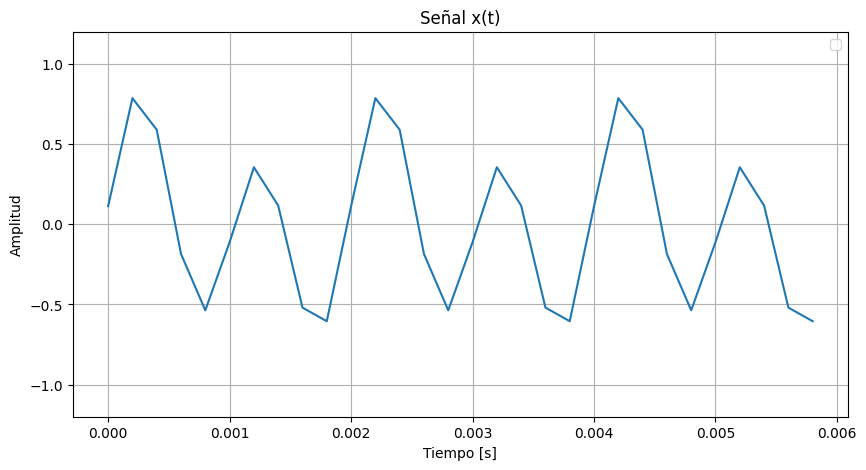

In [ ]:

# Parámetros de la señal
a = 0.3  # Amplitud señal 1
w1 = 1000 * np.pi  # Velocidad angular señal 1
phi1 = -np.pi / 4  # Fase señal 1

b = 0.6  # Amplitud señal 2
w2 = 2000 * np.pi  # Velocidad angular señal 2

c = 0.1  # Amplitud señal 3
w3 = 11000 * np.pi  # Velocidad angular señal 3
phi3 = -np.pi  # Fase señal 3

# Período fundamental y tiempo para 3 períodos
T_fundamental = 1 / 500  # Período fundamental = 0.002 s
Fs=5000
Ts=1/Fs
num_periodos = 3
tv = np.arange(0,num_periodos*T_fundamental,Ts)#procesan 3 periodos discretizados


# Definición de la señal x(t)
x = a * np.cos(w1 * tv + phi1) + b * np.sin(w2 * tv) + c * np.cos(w3 * tv + phi3)

# Graficar la señal
plt.figure(figsize=(10, 5))
plt.plot(tv, x)
plt.title('Señal x(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.ylim([-1.2, 1.2])
plt.legend()
plt.show()


Ahora traemos la funcion de cero y pendiente que se vieron en clases anteriores para realizarle a la funcion $x(t)$



In [ ]:
def my_ceropen(x,ymin, ymax): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [ ]:
xcs= my_ceropen(x,ymin=-3.3, ymax= 3.3)

ahora graficamos las señale para ver la diferencia

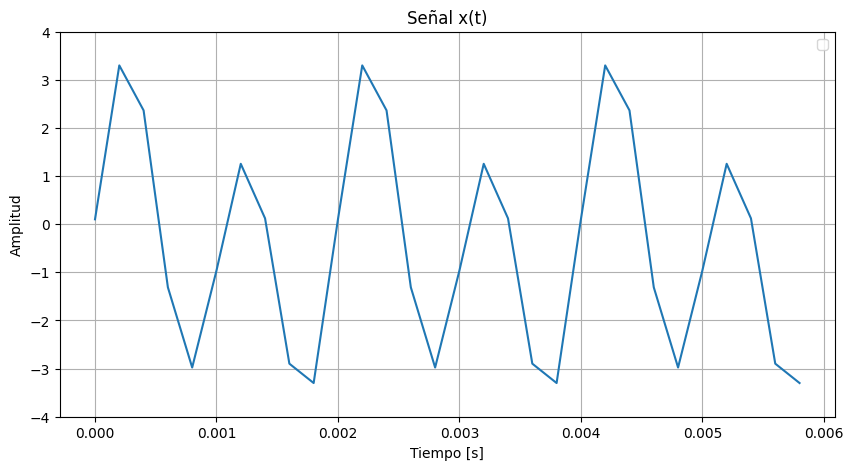

In [ ]:
# Graficar la señal
plt.figure(figsize=(10, 5))
plt.plot(tv, xcs)
plt.title('Señal x(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.ylim([0, 10])
plt.legend()
plt.ylim(-4, 4) # Ajusta el límite inferior del eje x a 0
plt.show()

In [ ]:
#número de bits y vector de cuantización
nbits = 5
vmin = -3.3
vmax = 3.3
ve = np.linspace(vmin,vmax,2**nbits) # (vmax-vmin)/(2^#bits - 1) -> si se


In [ ]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [ ]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(xcs.shape[0]):
   if i==0: #primera muestra
     xq = my_cuantizador(xcs[i],ve)
   else:
     xq = np.append(xq,my_cuantizador(xcs[i],ve)) #apilar datos cuantizando si i>0


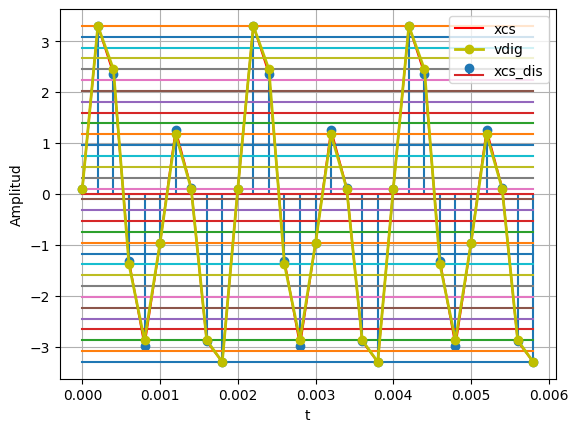

In [ ]:
#graficar señales

plt.plot(tv,xcs,c='r', label='xcs')#cs continua

plt.stem(tv,xcs, label='xcs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,xq,c='y',marker='o',label='vdig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

Como podemos denotar de la funcion original y la que se discretizo y cuantizo nos estamos perdiendo de informacion debido a que no estamos respetando el teorema de niquist

ahora vamos hacer la segunda parte del ejercicio utlizamos un ciclo infito while true para decirle al usuario que digite al menos el doble de la frecuencia maxima para poder evitar el aliasing o distorsion, y solo queda copiar el codigo anterior cuando se salga del bucle y ya se finalizaria el ejercicio


Ingrese la frecuencia de muestreo: 11000
Ingrese el numero de bits: 5


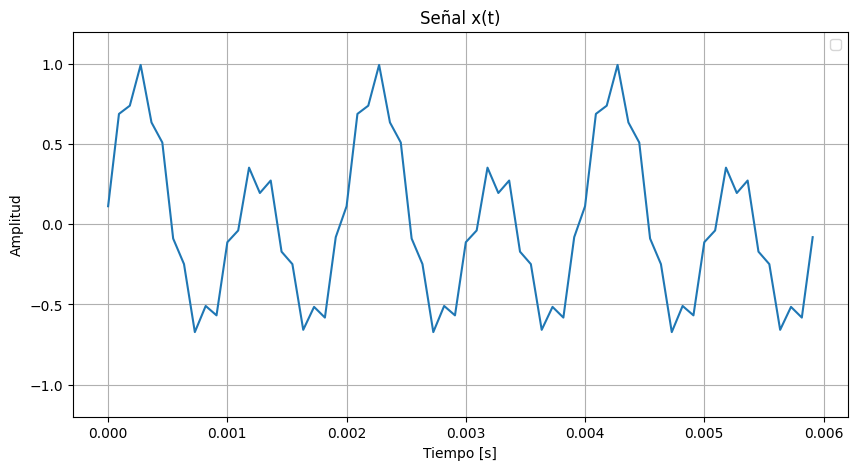

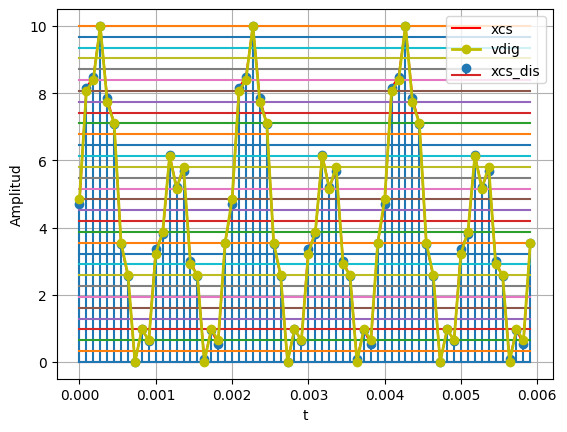

In [ ]:
while True:
  Fs = int(input("Ingrese la frecuencia de muestreo: "))

  if Fs >= 11000:
    break  # Salir del bucle si Fs es válida
  else:
    int(input("La frecuencia de muestreo no es suficiente para que no haya aliasing o distorsion, por favor de un valor mayor a 2 veces la frecuencia maxima que hay en la señal(5500hz)"))
#
nbits = int(input("Ingrese el numero de bits: "))

# Período fundamental y tiempo para 3 períodos
T_fundamental = 1 / 500# Período fundamental = 0.002 s
Ts=1/Fs
num_periodos = 3
tv = np.arange(0,num_periodos*T_fundamental,Ts)#procesan 3 periodos discretizados

# señal original
x = a * np.cos(w1 * tv + phi1) + b * np.sin(w2 * tv) + c * np.cos(w3 * tv + phi3)

# Graficar la señal
plt.figure(figsize=(10, 5))
plt.plot(tv, x)
plt.title('Señal x(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.ylim([-1.2, 1.2])
plt.legend()
plt.show()
xcs= my_ceropen(x,ymin=0, ymax=10)
#número de bits y vector de cuantización
rmin = 0
rmax = 10
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se
for i in range(xcs.shape[0]):
  if i==0: #primera muestra
    xq = my_cuantizador(xcs[i],ve)
  else:
    xq = np.append(xq,my_cuantizador(xcs[i],ve)) #apilar datos cuantizando si i>0
#graficar señales

plt.plot(tv,xcs,c='r', label='xcs')#cs continua

plt.stem(tv,xcs, label='xcs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,xq,c='y',marker='o',label='vdig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()



# Pregunta 2 (valor 2.5 puntos)

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

$x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$

In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-05 22:10:20--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 173.194.194.101, 173.194.194.102, 173.194.194.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.194.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-05 22:10:20--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.69.132, 2607:f8b0:4001:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.69.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    in 

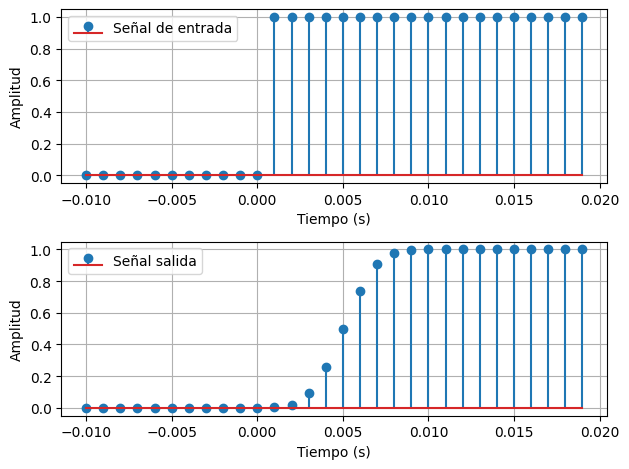

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

#Rta//

Para verificar que es un sistema lineal invariante con el tiempo, se tiene que primero mirar si al sumar 2 entradas o hacer suposicion de 2 entradas la salida deberia ser igual que si se hacen independientes y luego se suman como se muestra a continuacion

\begin{equation}
H[x(t)]+H[y(t)]=H[x(t)+y(t)]
\end{equation}
entonces simulamos para ver si es lineal

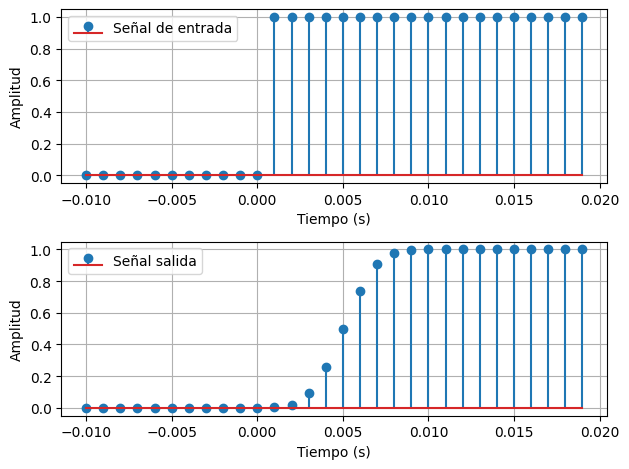

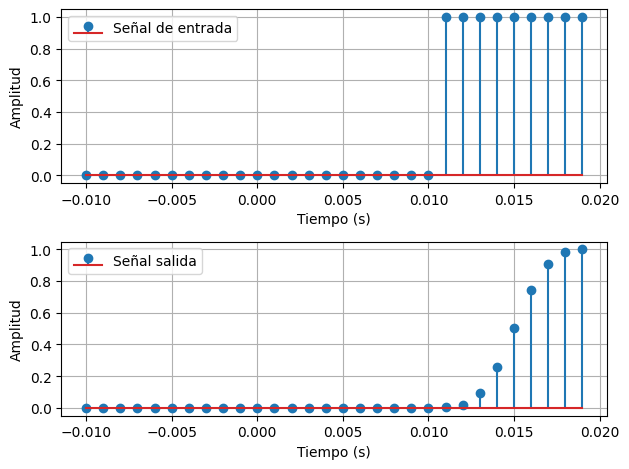

In [ ]:
#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
#señal 1
signal_u1 = np.heaviside(t,1) # función heaviside
y_u1 = my_system.predict(signal_u1)
#señal 2
signal_u2 = np.heaviside(t-0.01,1) # función heaviside
y_u2 = my_system.predict(signal_u2)

#superposicion
signal_u = signal_u1+signal_u2
y_u = y_u1+y_u2

y_uo= my_system.predict(signal_u)

# Visualización de las señales entrada
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u1, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u1, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u2, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u2, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()



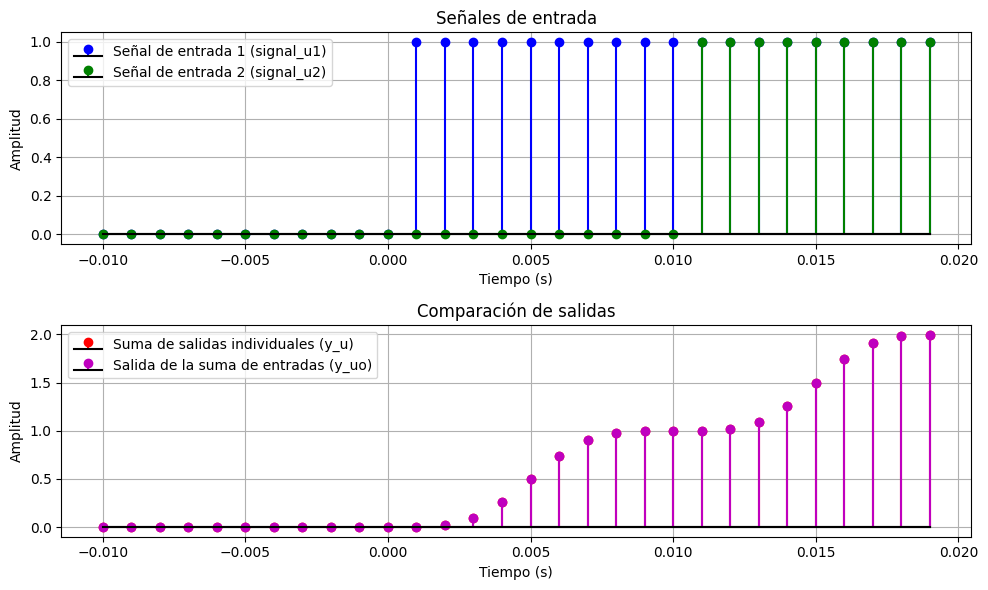

In [ ]:
# Sistema
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs  # Frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Vector de tiempo

# Señal 1
signal_u1 = np.heaviside(t, 1)  # Heaviside centrada
y_u1 = my_system.predict(signal_u1)  # Salida para la señal 1

# Señal 2
signal_u2 = np.heaviside(t - 0.01, 1)  # Heaviside desplazada
y_u2 = my_system.predict(signal_u2)  # Salida para la señal 2

# Superposición
signal_u = signal_u1 + signal_u2  # Suma de entradas
y_u = y_u1 + y_u2  # Suma de salidas individuales
y_uo = my_system.predict(signal_u)  # Salida del sistema para la suma de entradas

# Visualización de las entradas combinadas
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs[0].stem(t, signal_u1, linefmt='b-', markerfmt='bo', basefmt='k-', label='Señal de entrada 1 (signal_u1)')
axs[0].stem(t, signal_u2, linefmt='g-', markerfmt='go', basefmt='k-', label='Señal de entrada 2 (signal_u2)')
axs[0].set_title('Señales de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()

# Visualización de las salidas combinadas
axs[1].stem(t, y_u, linefmt='r-', markerfmt='ro', basefmt='k-', label='Suma de salidas individuales (y_u)')
axs[1].stem(t, y_uo, linefmt='m-', markerfmt='mo', basefmt='k-', label='Salida de la suma de entradas (y_uo)')
axs[1].set_title('Comparación de salidas')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


Como podemos apreciar se cumple lo que de la superposicion de esa ecuacion donde coinciciden las ecuaciones exactamente en cada punto
\begin{equation}
H[x(t)]+H[y(t)]=H[x(t)+y(t)]
\end{equation}

ahora vamos a mirar para concluir si es lineal o no, con la multiplicacion del escalar donde esta la homogeneidad
\begin{equation}
\alpha H[x(t)]=H[\alpha x(t)]
\end{equation}

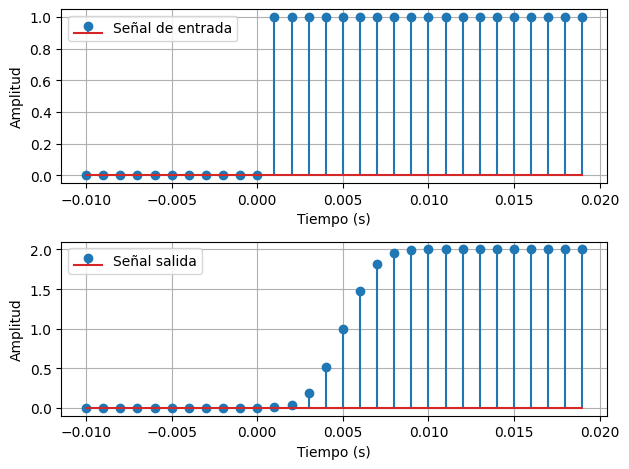

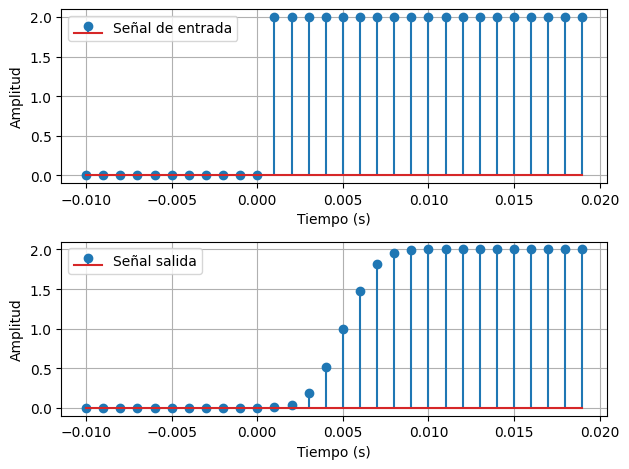

In [ ]:
alpha=2

#señal 1
signal_u1 = np.heaviside(t,1) # función heaviside
y_u1 = my_system.predict(signal_u1)
y_u1=alpha*y_u1

#señal 2
signal_u2= alpha*signal_u1
y_u2 = my_system.predict(signal_u2)

# Visualización de las señales 1
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u1, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u1, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

# Visualización de las señales 2
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u2, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u2, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

Como podemos apreciar se cumple la homogeneidad en este sistema donde coinciciden las ecuaciones exactamente en cada punto
\begin{equation}
\alpha H[x(t)]=H[\alpha x(t)]
\end{equation}
entonces podemos decir que este este sistema es lineal, ahora podemos verificar si es invariante en el tiempo desplazando en el tiempo
\begin{equation}
x(t)\rightarrow H[x(t)]\\
x(t-τ)→H[x(t-τ)]
\end{equation}

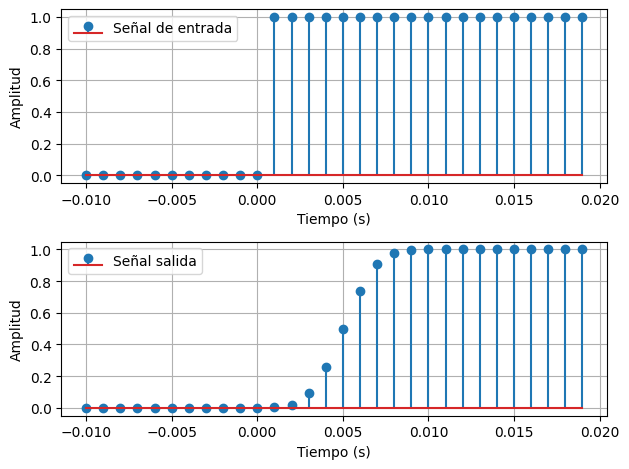

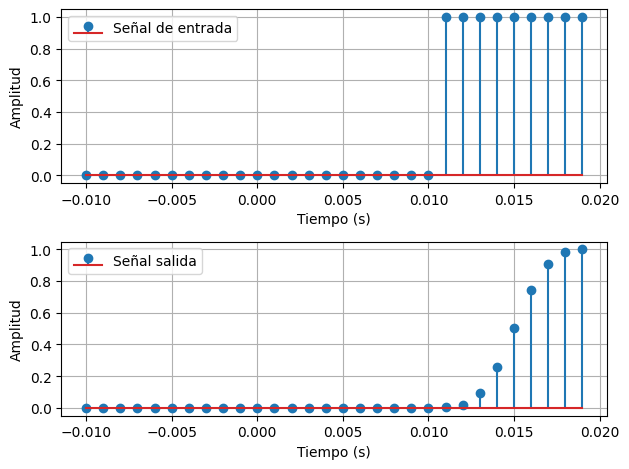

In [ ]:
#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales originales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()
#señal desplazada
signal_u = np.heaviside(t-0.01,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales desplazadas
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()



como se puede ver el sistema es invariante con el tiempo, mantiene su forma a pesar de estar desplazado, entonces si cumple con que es un SLIT(sistema lineal invariante en el tiempo).

Ahora se va determinar la respuesta al impulso

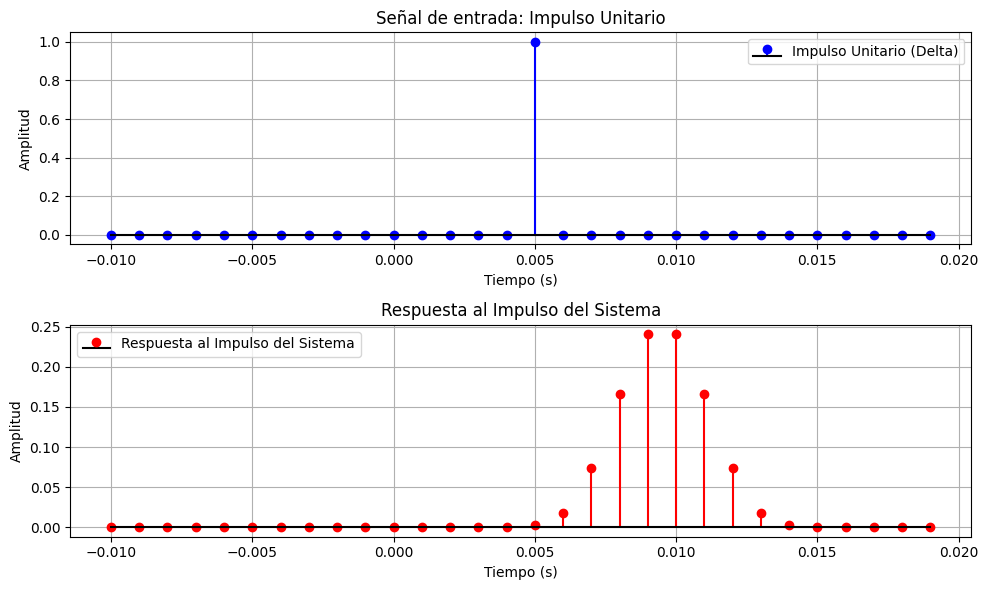

In [ ]:
# Generar una señal delta (impulso unitario)
delta = np.zeros(len(t))  # Crear un vector de ceros
delta[len(t) // 2] = 1    # Asignar el valor 1 en el centro (n=0)

# Obtener la respuesta al impulso del sistema
impulse_response = my_system.predict(delta)

# Graficar la señal delta y la respuesta al impulso
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Señal delta
axs[0].stem(t, delta, linefmt='b-', markerfmt='bo', basefmt='k-', label='Impulso Unitario (Delta)')
axs[0].set_title('Señal de entrada: Impulso Unitario')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()

# Respuesta al impulso
axs[1].stem(t, impulse_response, linefmt='r-', markerfmt='ro', basefmt='k-', label='Respuesta al Impulso del Sistema')
axs[1].set_title('Respuesta al Impulso del Sistema')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


ahora que tenemos la respuesta al impulso del sistema podemos utilizarla para hacer la convolucion y encontrar la salida del sistema $x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$



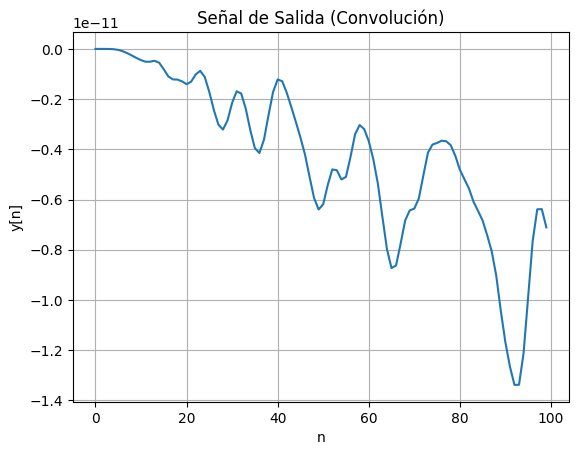

In [ ]:


# se Define la señal x[n]
n = np.arange(0, 100)  #
x = np.sin(100 * np.pi * n) + np.sin(600 * np.pi * n)

# se Realiza la convolución con numpy
y = np.convolve(x, impulse_response, mode='same')

# Grafica la señal de salida

plt.plot(n, y)
plt.title('Señal de Salida (Convolución)')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)
plt.show()



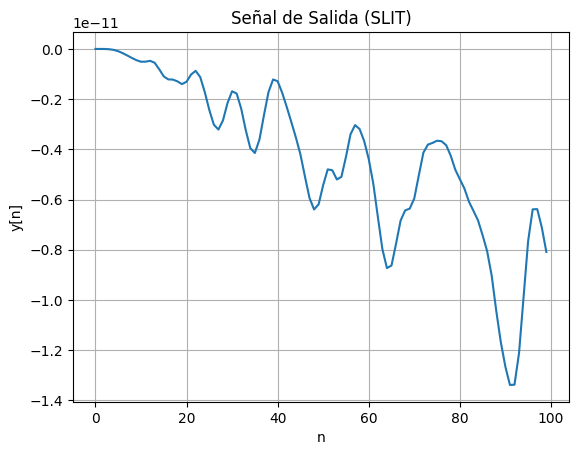

In [ ]:
yslit = my_system.predict(x)

# Graficar la señal original y la procesada
plt.plot(n, yslit)
plt.title('Señal de Salida (SLIT)')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)
plt.show()